In [2]:
import csv
import os
import scipy.io
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
folder_to_name = {'bam_overexpression': 'hsbam',
                  'wtF': 'wtF',
                  'wtJ': 'wtJ',
                  '96h': '96h',
                  'dpp_overexpression': 'tj_dpp',
                  'bam_mutants': 'bam',
                  'osk_nogerm': 'osk'
                 }
matrices_dir = "/Users/vickyle/Dropbox/Drosophila_Inferelator_Project (1)"
data_frames = {}

tech = 'cellranger'

for folder in folder_to_name:
    subfolder = folder_to_name[folder]
    matrix_dir = os.path.join(os.path.join(matrices_dir,subfolder), tech)
    mat = scipy.io.mmread(os.path.join(matrix_dir, "matrix.mtx"))
 
    genes_path = os.path.join(matrix_dir, "genes.tsv")
    gene_ids = [row[0] for row in csv.reader(open(genes_path), delimiter="\t")]
    gene_names = [row[1] for row in csv.reader(open(genes_path), delimiter="\t")]
 
    barcodes_path = os.path.join(matrix_dir, "barcodes.tsv")
    barcodes = [row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")]
    arr=mat.toarray()
    df = pd.DataFrame(arr)
    df.index = gene_names
    df.columns = barcodes 
    data_frames[folder] = df

In [4]:
arr[1:100, 1:100]

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

/Users/vickyle/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


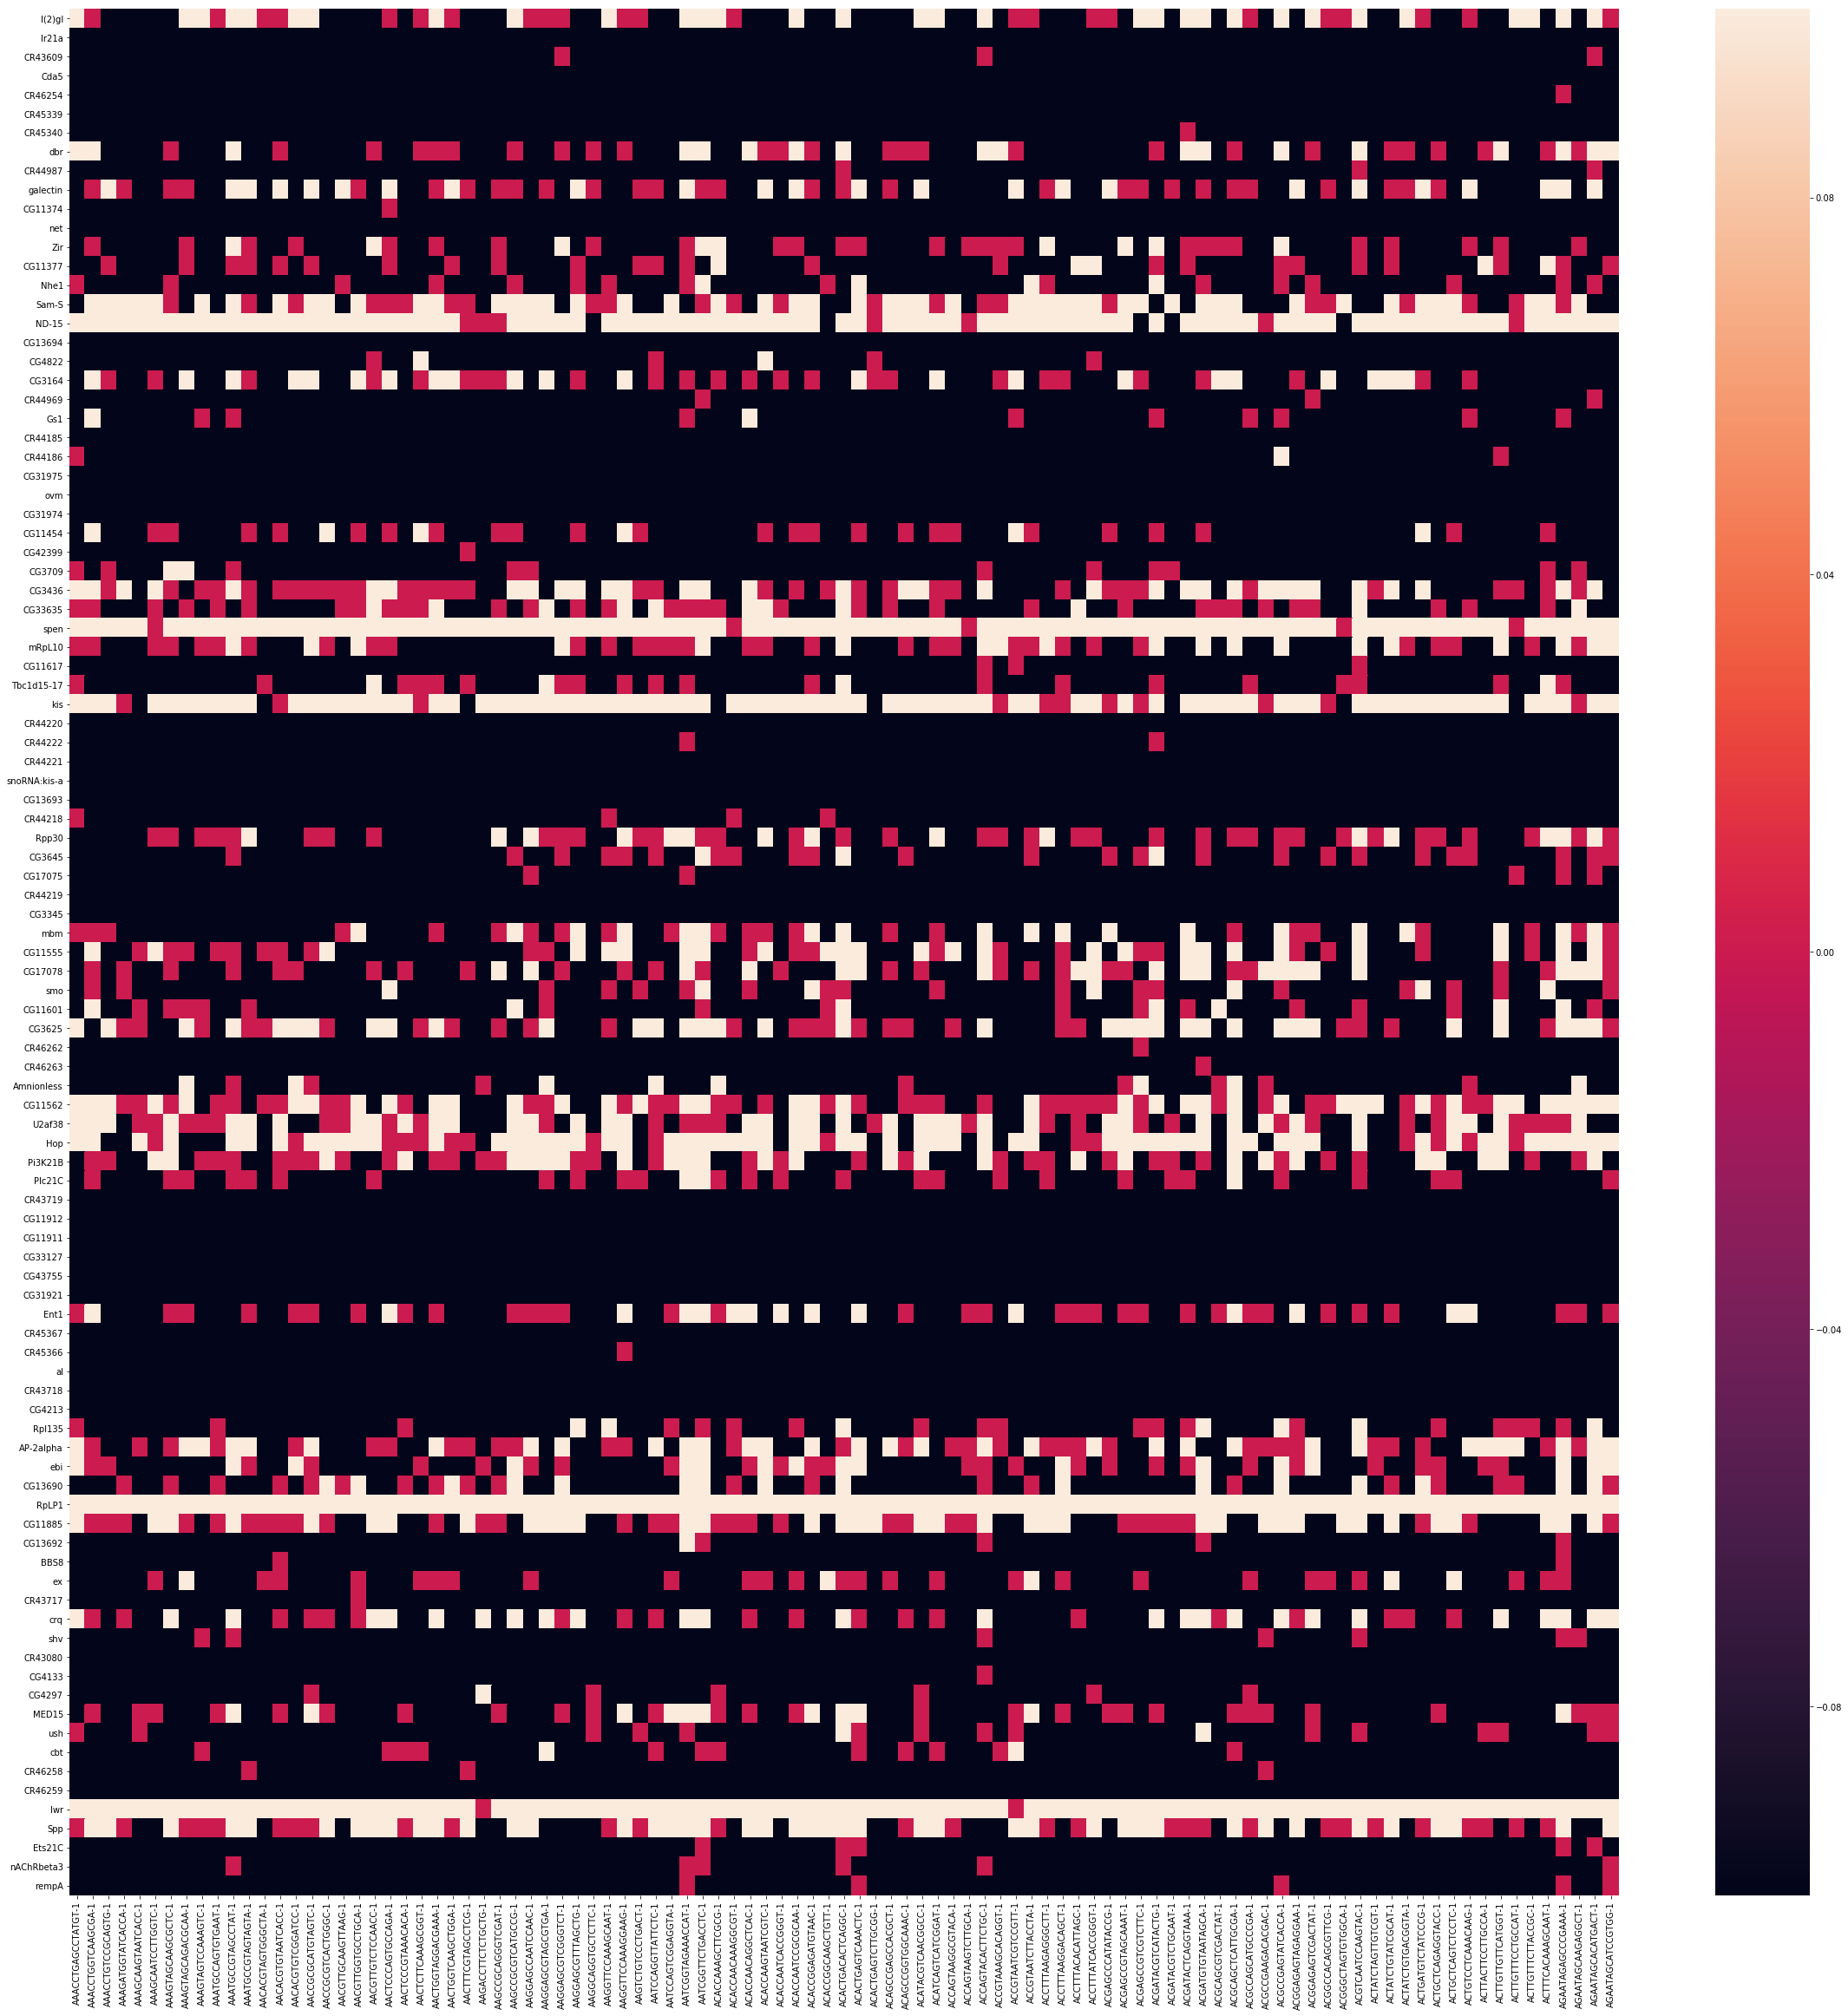

In [6]:
plt.figure(figsize=(40, 40))
sns.heatmap(np.log(data_frames['wtF'].iloc[1:100, 1:100]))

In [4]:
df = data_frames['wtF']

In [5]:
df.head()

,AAACCTGAGAGGACGG-1,AAACCTGAGCCTATGT-1,AAACCTGGTCAAGCGA-1,AAACCTGTCCGCAGTG-1,AAAGATGGTATCACCA-1,AAAGCAAGTAATCACC-1,AAAGCAATCCTTGGTC-1,AAAGTAGCAAGCGCTC-1,AAAGTAGCAGACGCAA-1,AAAGTAGTCCAAAGTC-1,...,TTGGAACTCCTTCAAT-1,TTGGAACTCTGCGACG-1,TTGTAGGCAGACACTT-1,TTTACTGAGAAGAAGC-1,TTTACTGAGGTGCAAC-1,TTTATGCGTAGAAGGA-1,TTTCCTCCACGGCCAT-1,TTTGCGCAGTACGCGA-1,TTTGCGCCATTAGGCT-1,TTTGGTTGTCCCTACT-1
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,1,3,1,0,0,0,0,0,2,3,...,0,0,2,2,0,7,15,2,1,1
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
df = pd.DataFrame(arr)
df.index = gene_names

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,0,0,0,0,0,1,5,1,0,0,...,1,0,5,0,2,1,0,9,0,0
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


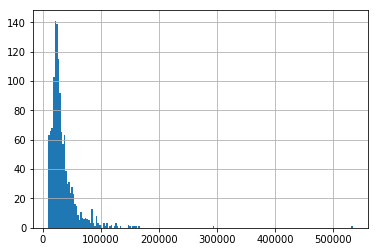

In [9]:
df.sum(axis=0).hist(bins=200)

In [11]:
df.sum(axis=0).min()

9884

## Reproducing tSNE clustering of ~7 cell types

We aim to see if all 7 dataframes can be normalized, filtered and reduced such that their dimensionality reduction clustering recaptures the 7 cell type clusterings. However, it's also possible that the mutant / overexpression data sets have fewer clusters. 

Then, we can take an intermediary data matrix, likely of the variable, normalized genes, and use that as input to the Inferelator

In [9]:
df.columns = barcodes

In [10]:
df.head()

,AAACCTGCACTCGACG-1,AAACCTGGTTACCAGT-1,AAACCTGGTTCACCTC-1,AAAGATGCAAGTAATG-1,AAAGATGCATTTCACT-1,AAAGATGTCATAACCG-1,AAAGCAAAGCACCGCT-1,AAAGCAACAAGACACG-1,AAAGCAAGTCGTGGCT-1,AAAGTAGCAGTTCCCT-1,...,TTTGCGCCAGGACGTA-1,TTTGCGCGTCGACTAT-1,TTTGGTTAGCAGACTG-1,TTTGGTTAGCGTTTAC-1,TTTGGTTGTTAGATGA-1,TTTGGTTTCCACGCAG-1,TTTGTCAAGAGTACAT-1,TTTGTCAAGCTGATAA-1,TTTGTCAGTCTGGTCG-1,TTTGTCAGTTCAGGCC-1
CG11023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
l(2)gl,0,0,0,0,0,1,5,1,0,0,...,1,0,5,0,2,1,0,9,0,0
Ir21a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CR43609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cda5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


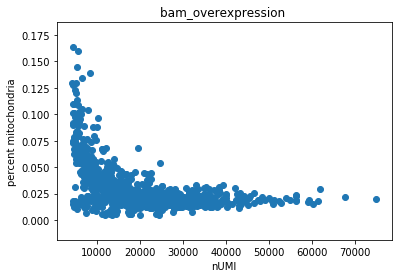

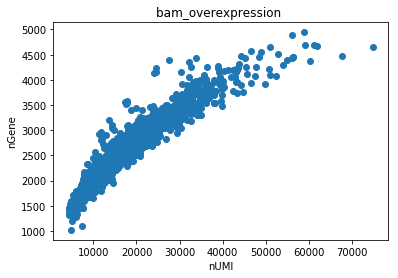

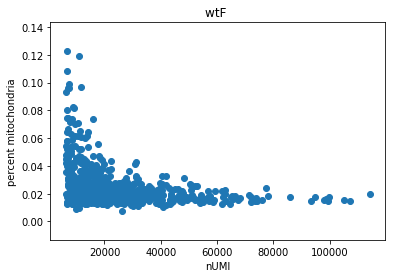

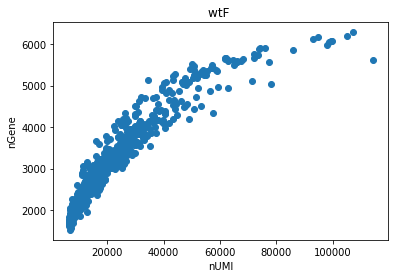

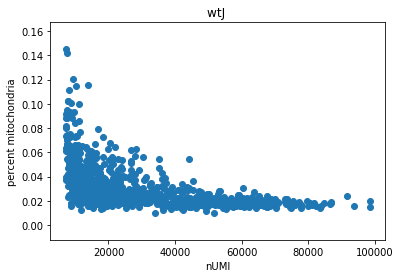

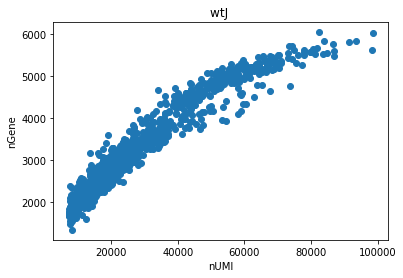

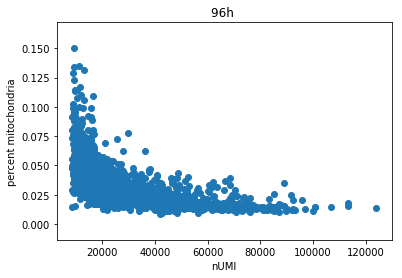

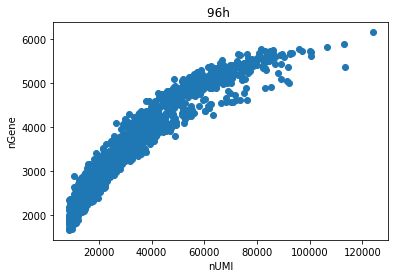

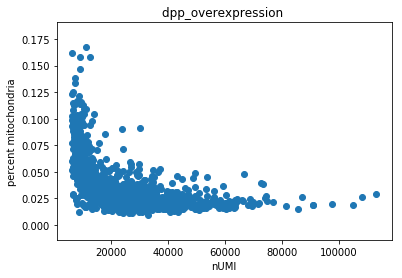

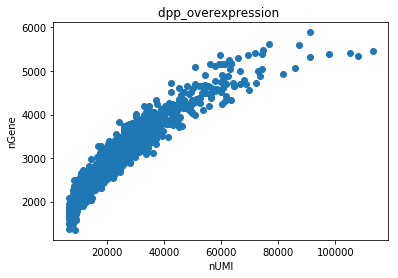

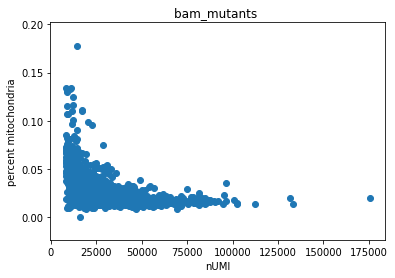

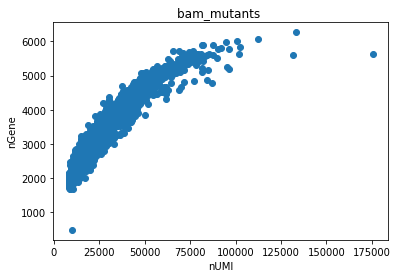

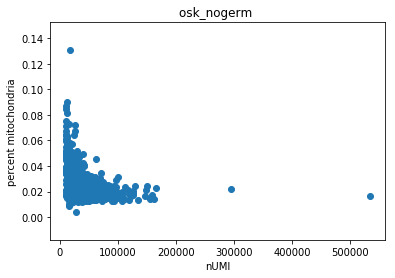

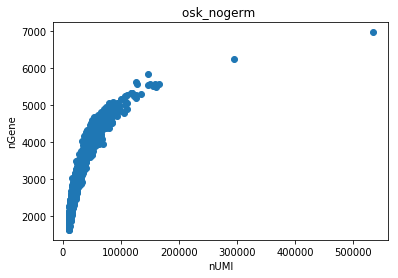

In [8]:
filtered_data_frames = {}
filtered_lengths = {}
for df_key in data_frames:
    df = data_frames[df_key]
    original_len = df.shape[1]
    mito_df = df[[x.__contains__("mt:") for x in df.index]]
    percent_mito = mito_df.sum(axis=0)/df.sum(axis = 0)
    nGene = df[df > 0].count(axis = 0)
    percent_mito_5percent = percent_mito < 0.05
    number_nGene_250 = 250 < nGene 
    number_nGene_5000 = nGene < 5000
    df_filtered = df.loc[:, percent_mito_5percent & number_nGene_5000 & number_nGene_250]
    new_len = df_filtered.shape[1]
    nUMI = df.sum(axis = 0)
    plt.scatter(nUMI, percent_mito)
    plt.xlabel('nUMI')
    plt.ylabel('percent mitochondria')
    plt.title('{} '.format(df_key))
    plt.show()
    plt.scatter(nUMI, nGene)
    plt.xlabel('nUMI')
    plt.ylabel('nGene')
    plt.title('{} '.format(df_key))
    plt.show()
    filtered_lengths[df_key] = (original_len, new_len)
    filtered_data_frames[df_key] = df_filtered

In [14]:
filtered_lengths, idx

({'96h': (1697, 1322),
  'bam_mutants': (1526, 1255),
  'bam_overexpression': (1252, 1121),
  'dpp_overexpression': (1524, 1289),
  'osk_nogerm': (1294, 1230),
  'wtF': (753, 647),
  'wtJ': (1178, 943)},
 array([0, 1, 2, 3, 4, 5, 6]))

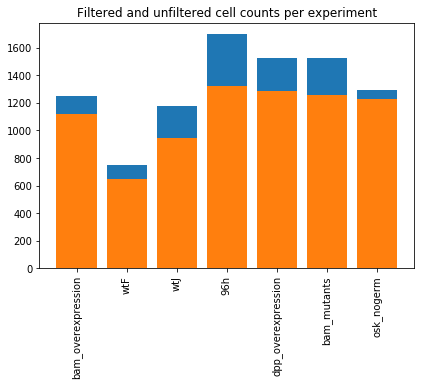

In [10]:
idx = np.arange(len(filtered_lengths))
plt.bar(idx, [x[0] for x in filtered_lengths.values()])
plt.bar(idx, [x[1] for x in filtered_lengths.values()])
plt.tight_layout()
plt.xticks(idx, filtered_lengths.keys(),  rotation='vertical')
plt.title('Filtered and unfiltered cell counts per experiment')
plt.show()


In [288]:
combined = pd.concat(filtered_data_frames.values(), join='outer', axis  =1 )


In [289]:
combined.shape

(17433, 7807)

In [296]:
scale_factor = 10000
# pseudocount added so that log isn't taken of 0
combined_transformed = np.log((combined / combined.sum() *  scale_factor) + 1)

In [302]:
combined_transformed.to_csv(os.path.join(matrices_dir, "filtered_log_transformed_merged_reads.tsv"), sep='\t')

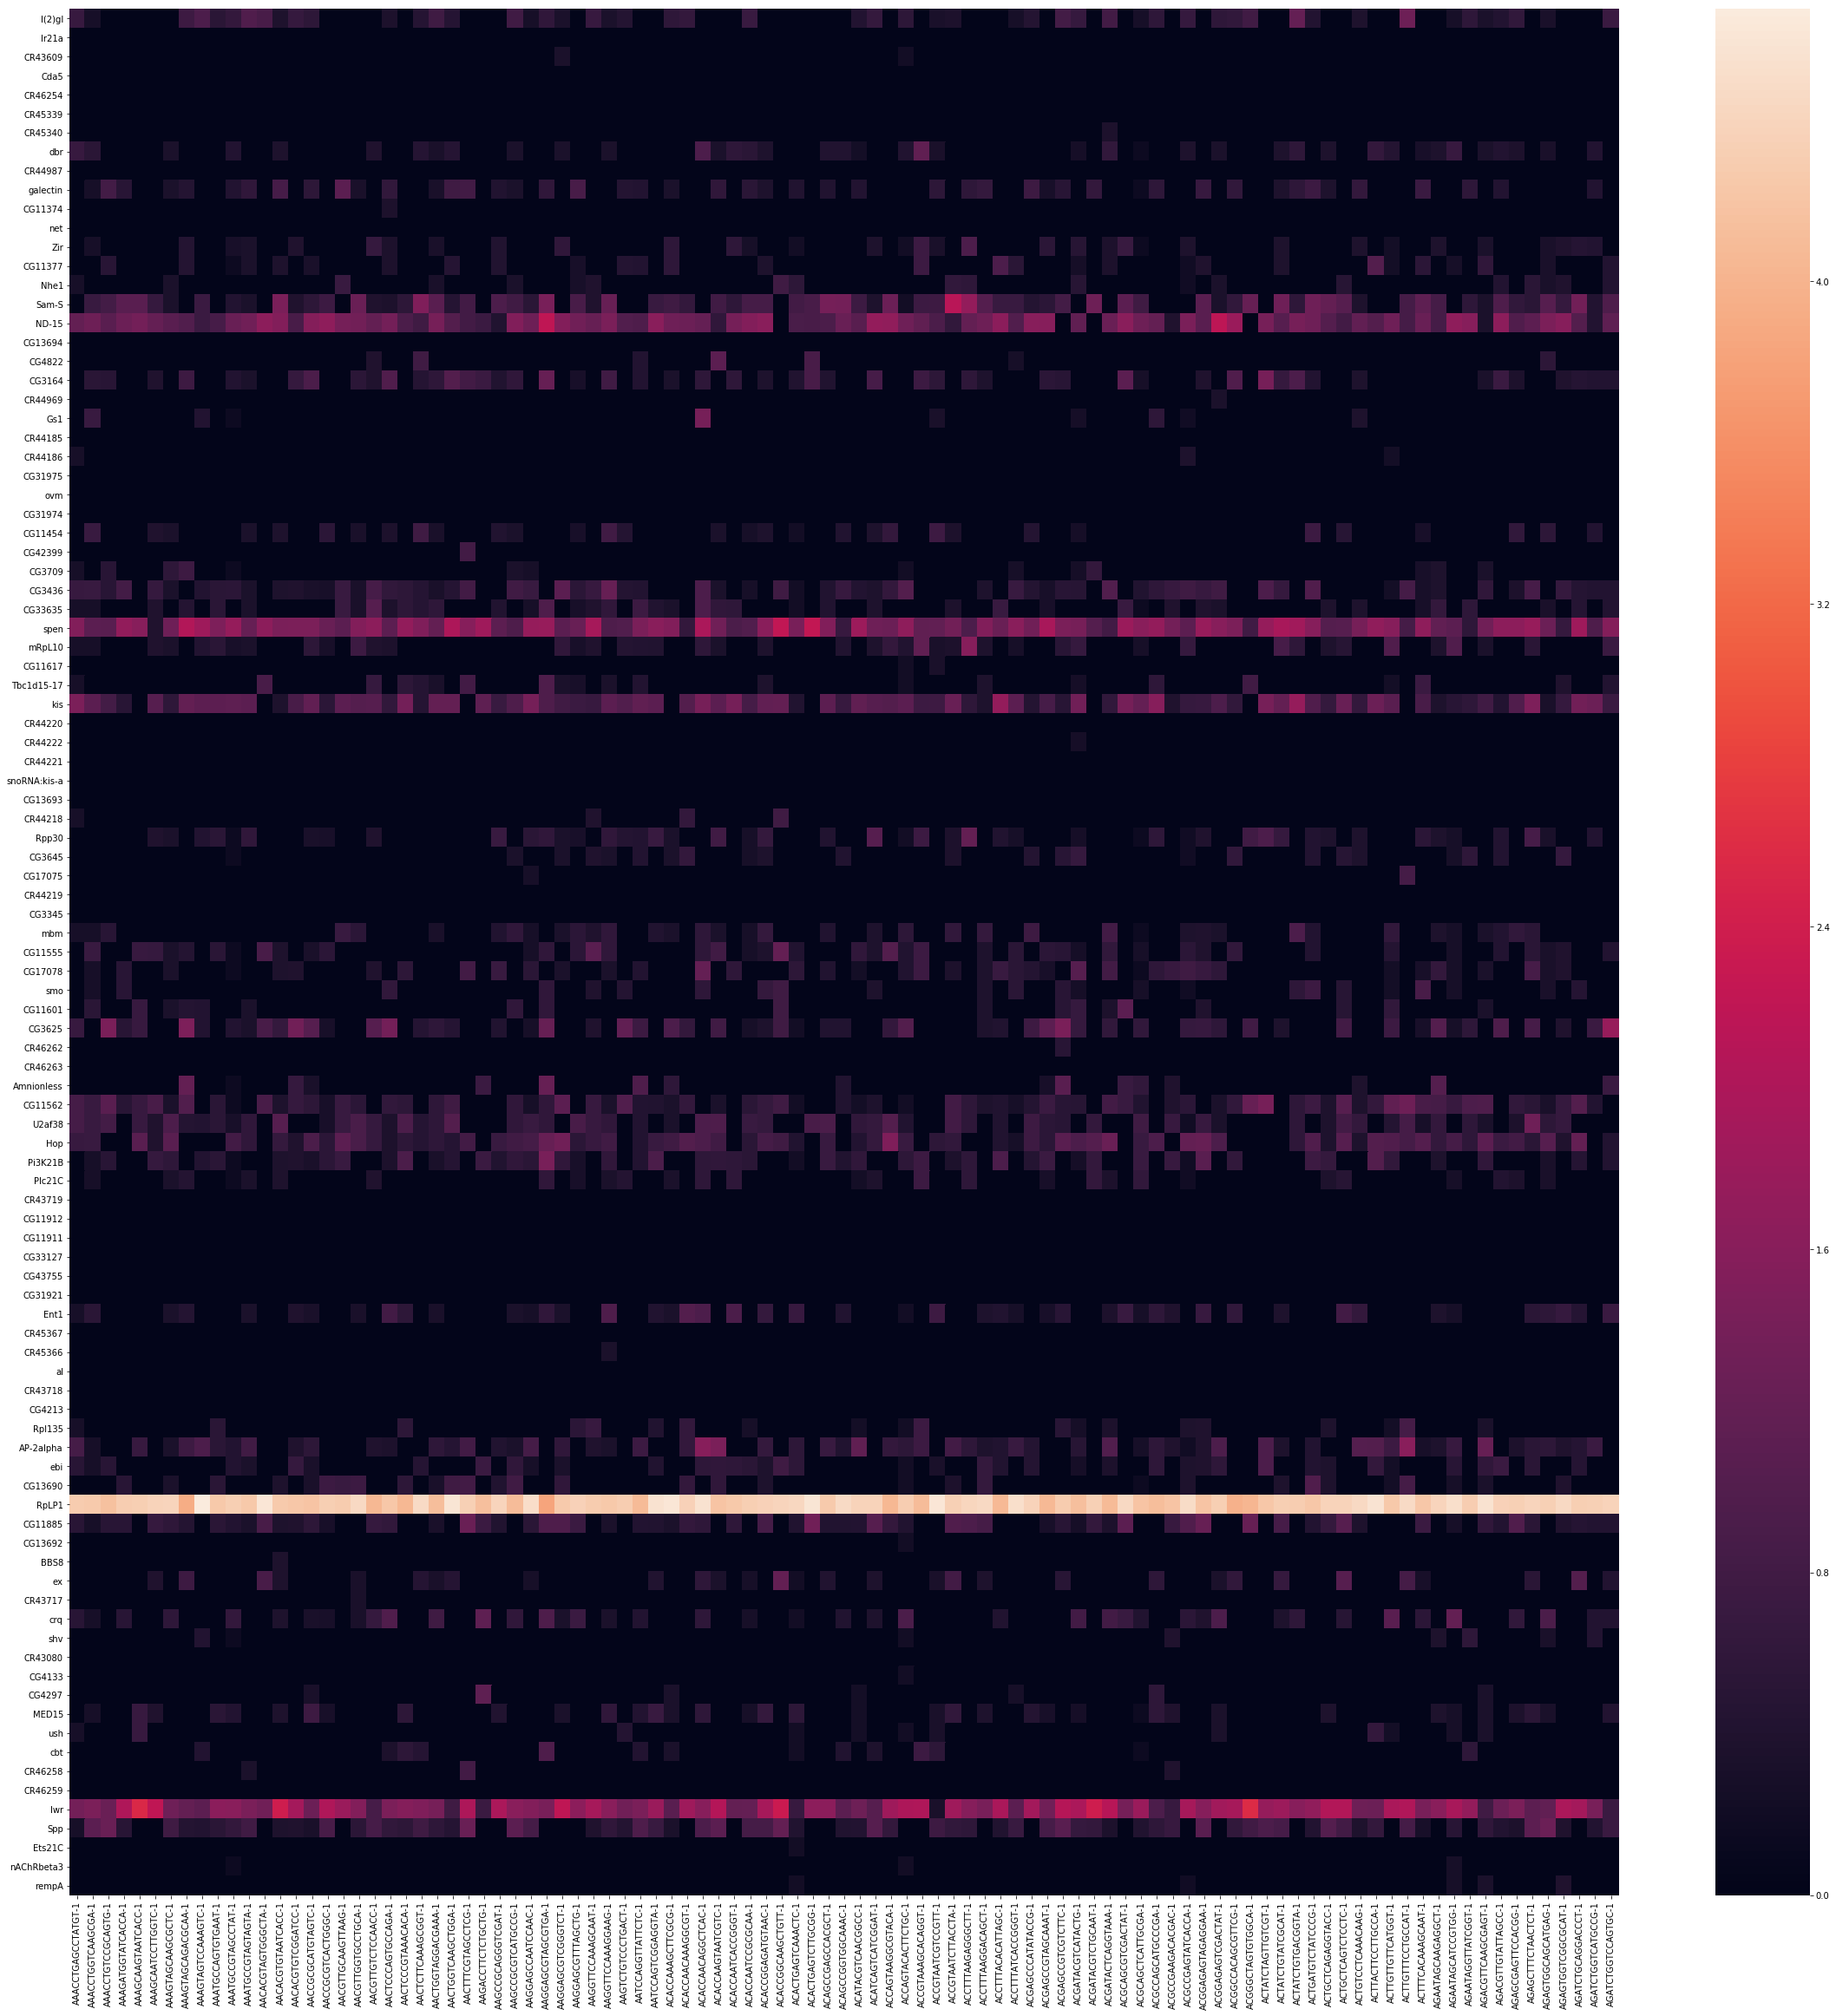

In [300]:
plt.figure(figsize=(40, 40))
sns.heatmap(combined_transformed.iloc[1:100, 1:100])

In [301]:
combined_transformed.shape

(17433, 7807)

In [303]:
combined_transformed.iloc[:, 1:100].to_csv(os.path.join(matrices_dir, "expression.tsv"), sep='\t')